<a href="https://colab.research.google.com/github/hyeonu96/first-repository/blob/main/%5BEX_07%5D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%88%98%EC%97%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트: 고양이 수염 스티커 만들기

In [8]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
import os

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## Step 1. 스티커 구하기 or 만들기

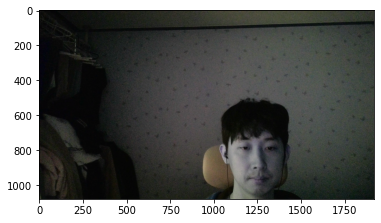

In [9]:
my_image_path = '/content/drive/MyDrive/kim.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_show = img_bgr.copy()      # 출력용 이미지 따로 보관
plt.imshow(img_bgr)
plt.show()

>>출력 결과, 얼굴에 푸른빛이 감돈다. 

OpenCV는 BGR(파랑, 녹색, 빨강)을 사용. 사진에서 붉은색<->푸른색으로 바뀌어 출력됨

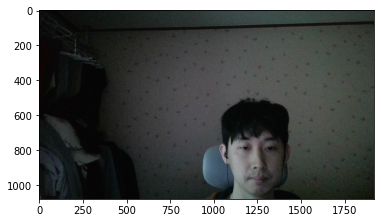

In [10]:
# RGB로 이미지 보정
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [11]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [12]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(1060, 675) (1445, 1060)]]


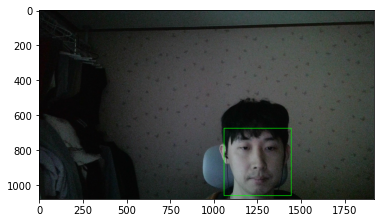

In [13]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [16]:
#저장한 landmark 모델 불러오기
model_path = '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [17]:
list_landmarks = []

In [19]:
# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)#rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능.
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


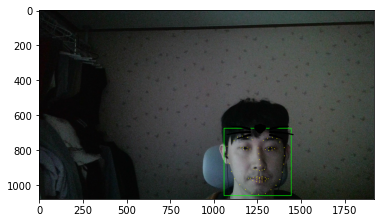

In [31]:
#랜드마크 영상에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 4. 스티커 적용하기

In [32]:
#좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

#스티커 이미지를 읽어서 적용
sticker_path = '/content/drive/MyDrive/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지 읽기
img_sticker = cv2.resize(img_sticker, (w,h))  #윗 단계에서 계산한 크기로 리사이즈
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(1267, 887)
(x,y) : (1267,887)
(w,h) : (386,386)
(386, 386, 3)
(x,y) : (1074,501)


In [33]:
# 스티커 이미지 시작 좌표 (위좌)
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print("(x, y) : ({}, {})".format(refined_x, refined_y))

(x, y) : (1074, 694)


In [34]:
# 스티커가 원본 이미지의 범위를 벗어날때
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print('(x, y): (%d, %d)' %(refined_x, refined_y))

(x, y): (1074, 694)


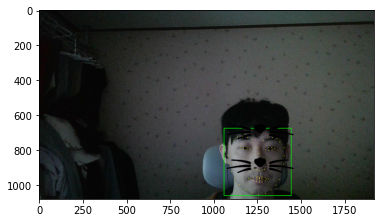

In [35]:
# img_show[from: to] 형식

# 원본 이미지에서 스티커 적용할 위치 crop한 이미지
sticker_area = img_show[refined_y: refined_y+img_sticker.shape[0],
                       refined_x: refined_x+img_sticker.shape[1]]
img_show[refined_y: refined_y+img_sticker.shape[0],
        refined_x: refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

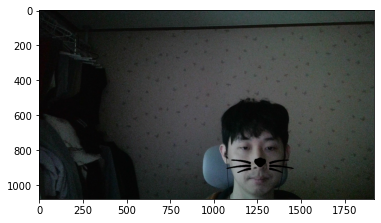

In [36]:
# img_show 대신 img_rbg 이용해보기

sticker_area = img_bgr[refined_y: refined_y+img_sticker.shape[0],
                       refined_x: refined_x+img_sticker.shape[1]]
img_bgr[refined_y: refined_y+img_sticker.shape[0],
        refined_x: refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 여러가지 테스트

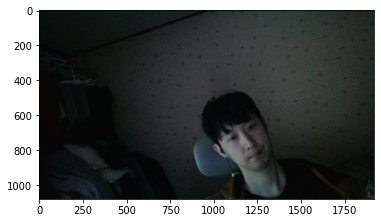

In [37]:
## 각도 바꿔보기
my_image_path = '/content/drive/MyDrive/KIM1.jpg'
img_bgr = cv2.imread(my_image_path) # OpenCV로 이미지 불러오기
img_show = img_bgr.copy() # 출력 이미지 따로 보관

# RGB 변형
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(1026, 598) (1347, 919)]]


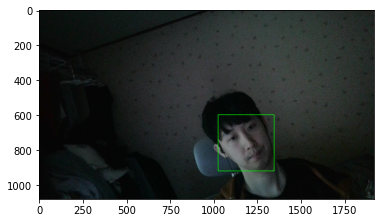

In [38]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()

# detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, # of image pyramid)

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left() # 왼쪽 아래
    t = dlib_rect.top() # 왼쪽 위
    r = dlib_rect.right() # 오른쪽 위
    b = dlib_rect.bottom() # 오른쪽 아래
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


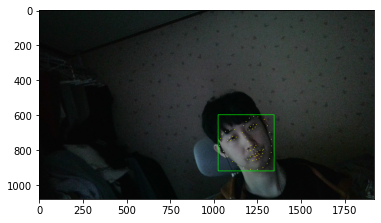

In [39]:
# 저장한 landmark 모델 불러오기
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # (RGB, rectangle)
    # face landmark 좌표 저장하기
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# landmark 점 찍기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [40]:
# 좌표 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) # 코 끝의 index = 33
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('코의 위치 (x, y) : (%d, %d)' %(x, y))
    print('box 크기 (w, h) : (%d, %d)' %(w, h))

    
# 스티커 이미지 시작 좌표 (top-left 좌표)
refined_x = x - w//2 # left
refined_y = y - h//2 # top

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print('스티커 좌표 (x, y): (%d, %d)' %(refined_x, refined_y))

(1227, 796)
코의 위치 (x, y) : (1227, 796)
box 크기 (w, h) : (322, 322)
스티커 좌표 (x, y): (1066, 635)


In [41]:
img_sticker = cv2.imread(sticker_path) # 스티커 이미지 불러오기
img_sticker = cv2.resize(img_sticker, (w, h)) # 스티커 resize

print(img_sticker.shape)

(322, 322, 3)


In [42]:
# (코의) x, y 좌표 조정 (top-left 좌표)
# 스티커 이미지 시작 좌표

refined_x = x - w//2# left
refined_y = y - h//2 # top

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print('(x, y): (%d, %d)' %(refined_x, refined_y))

(x, y): (1066, 635)


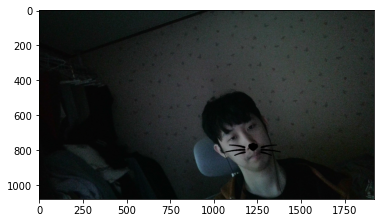

In [43]:
# img_show 대신 img_rbg 이용해보기

sticker_area = img_bgr[refined_y: refined_y+img_sticker.shape[0],
                       refined_x: refined_x+img_sticker.shape[1]]
img_bgr[refined_y: refined_y+img_sticker.shape[0],
        refined_x: refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기


*   얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

 스티커 또한 각도가 얼굴이 틀어진 각도만큼 변해야 하는데 변하지 않았다.

*   멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?

처음 사진을 찍을때부터 멀리서 찍어서 당연히 멀리서도 인식이 되는줄 알았다.
멀리서 찍은 사진도 잘 인식이 되는 모습. 하지만 어느정도 멀리까지 되는지 정확히 알 수 없다. 

*   실행 속도가 중요할까요?

잘 모르겠다.

*   스티커앱을 만들 때 정확도가 얼마나 중요할까요?

정확도는 중요하다. 정확하게 얼굴을 인식해야 원하는 포인트에 스티커를 붙일 수 있기 때문.



## 루브릭

1. 자기만의 카메라앱 기능 구현을 완수하였다.

얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.

2. 스티커 이미지를 정확한 원본 위치에 반영하였다.

정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.

얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.